<center><h1> Uvod u podatkovnu znanost  </h1></center>
<center><h2> Zimski semestar - 2023 </h2></center> 
<center><h3> Lab 5</h3></center> 
<center><h3> </h3></center> 
<center><h3> Vizualizacija podataka 2</h3></center> 

Ovo je vježba o vizualizaciji podataka! Koristit će se uobičajene python biblioteke, Matplotlib i Seaborn za stvaranje učinkovitih i jasnih vizualizacija. Radit ćete na skupu podataka koji sadrži informacije o deset filmova s najvećom zaradom svake godine.

Ovo su vizualizacije koje će se napraviti, a koje ćete koristiti za rješavanje vježbe:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Osim Matplotliba i Searbona, postoji mnogo više resursa koji bi vam mogli biti korisni, na primjer:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) te [Folium](https://python-visualization.github.io/folium/)

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, re
import seaborn as sns

episodes = pd.read_csv('simpsons_episodes.csv')

In [4]:
# extract some datetime variables
episodes['datetime'] = pd.to_datetime(episodes['original_air_date'])
episodes['datetime_year'] = episodes['datetime'].dt.year
episodes['datetime_month'] =episodes['datetime'].dt.month
episodes['datetime_day'] =episodes['datetime'].dt.day
episodes['datetime-MM-DD'] = episodes['datetime'].dt.strftime('%m-%d')

# 1. Tutorial: Korištenje biblioteke za vizualizaciju podataka

Koristit će se dataset blockbustera. Sažetak feature-a:

- *title*: Episode title
- *original_air_date*
- *production_code*
- *season*
- *number_in_season*
- *number_in_series*
- *us_viewers_in_millions*
- *views*
- *imdb_rating*
- *imdb_votes*
- *image_url*
- *video_url*

## Vizualizacija dviju kontinuiranih varijabli

- Je li se smanjivao IMDB rating i US views kroz godine
- Postoji mnogo načina kako se može ispitati odnos između dvije varijable. Najjednostavniji je dijagram scatterplot, koristeći plt.scatterplot()

Text(0, 0.5, 'IMDB rating')

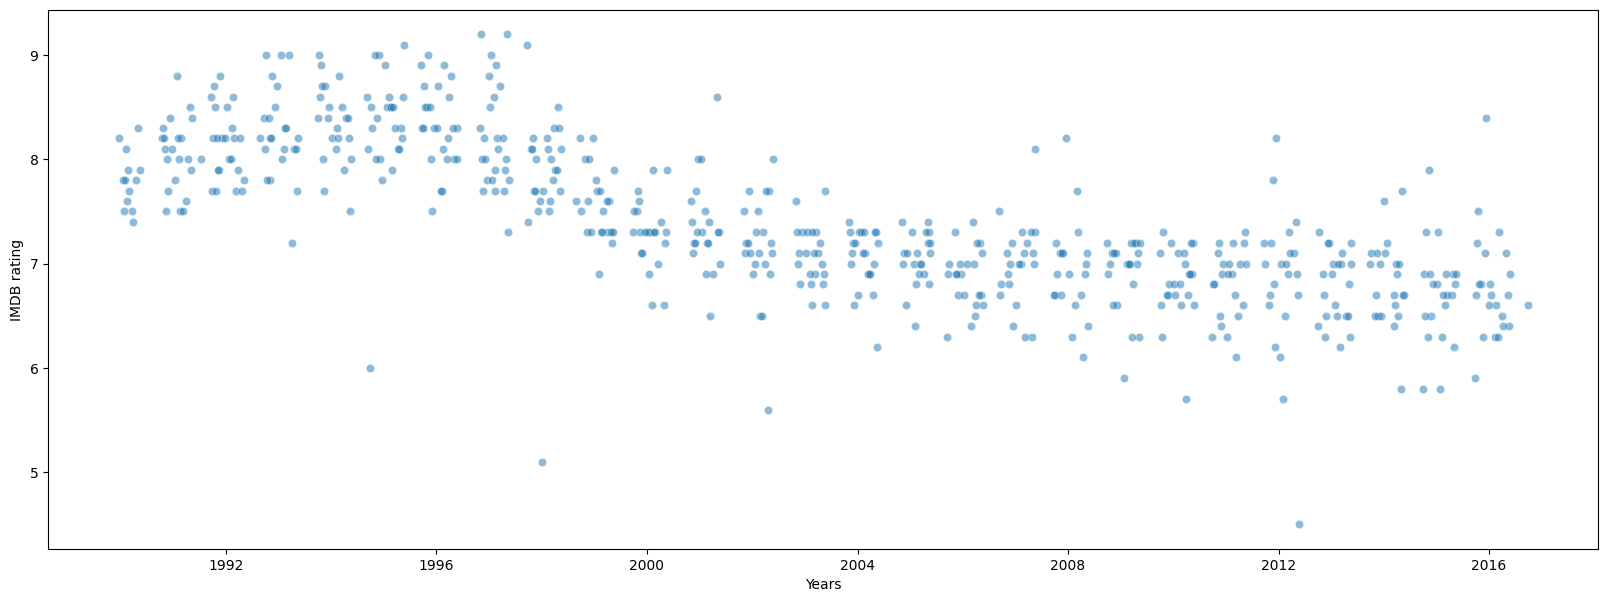

In [5]:
plt.figure(figsize=(20, 7))
sns.scatterplot(data=episodes, x="datetime", y="imdb_rating", alpha=0.5)
plt.xlabel("Years")
plt.ylabel("IMDB rating")

## Vizualizacija dviju varijabli, kontinuiranih i kategoričkih

- Razmotrimo IMDB rating i US views kroz godine i sezone emitiranja
- Prikazat ćemo barplot, boxplot i violinplot. Seaborn nudi mnogo više uvjerljivih vizualizacija. Bacite oko na primjere: https://seaborn.pydata.org/examples/index.html

Text(0, 0.5, 'IMDB rating')

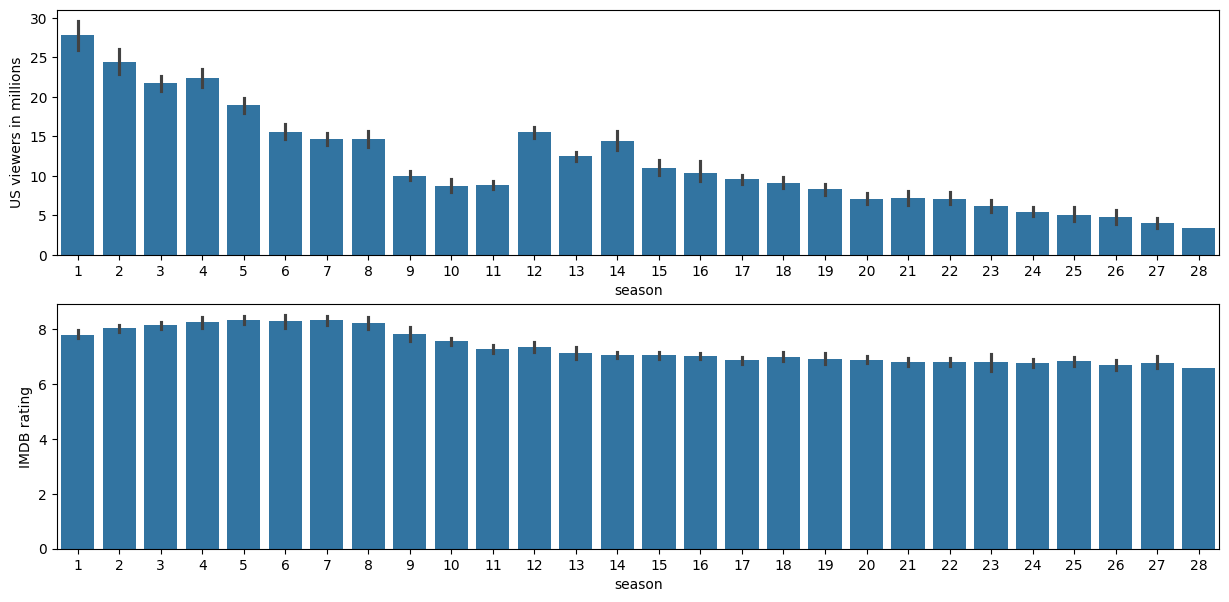

In [6]:
# barplot

plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
sns.barplot(data=episodes, x="season", y="us_viewers_in_millions")
plt.xlabel("season")
plt.ylabel("US viewers in millions")

plt.subplot(2,1,2)
sns.barplot(data=episodes, x="season", y="imdb_rating")
plt.xlabel("season")
plt.ylabel("IMDB rating")

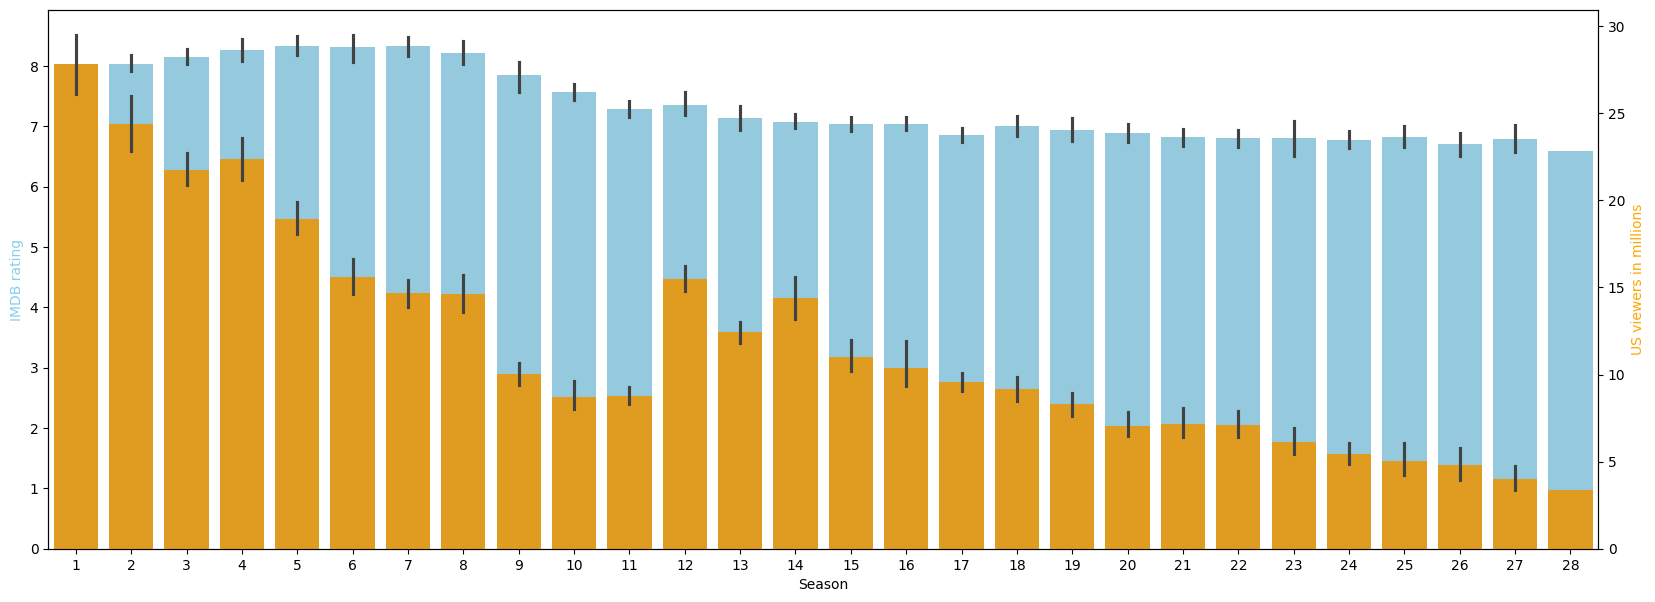

In [7]:
fig, ax1 = plt.subplots(figsize=(20,7))
sns.barplot(data=episodes, x="season", y="imdb_rating", ax=ax1, color='skyblue')
ax1.set_xlabel("Season")
ax1.set_ylabel("IMDB rating", color='skyblue')
#ax1.tick_params(axis='y', labelcolor='skyblue') vec obojano?
#Create a second y-axis
ax2 = ax1.twinx()
sns.barplot(data=episodes, x="season", y="us_viewers_in_millions", ax=ax2, color='orange')
ax2.set_ylabel("US viewers in millions", color='orange')
#ax1.tick_params(axis='y', labelcolor='orange')

plt.show()


Text(0, 0.5, 'IMDB rating')

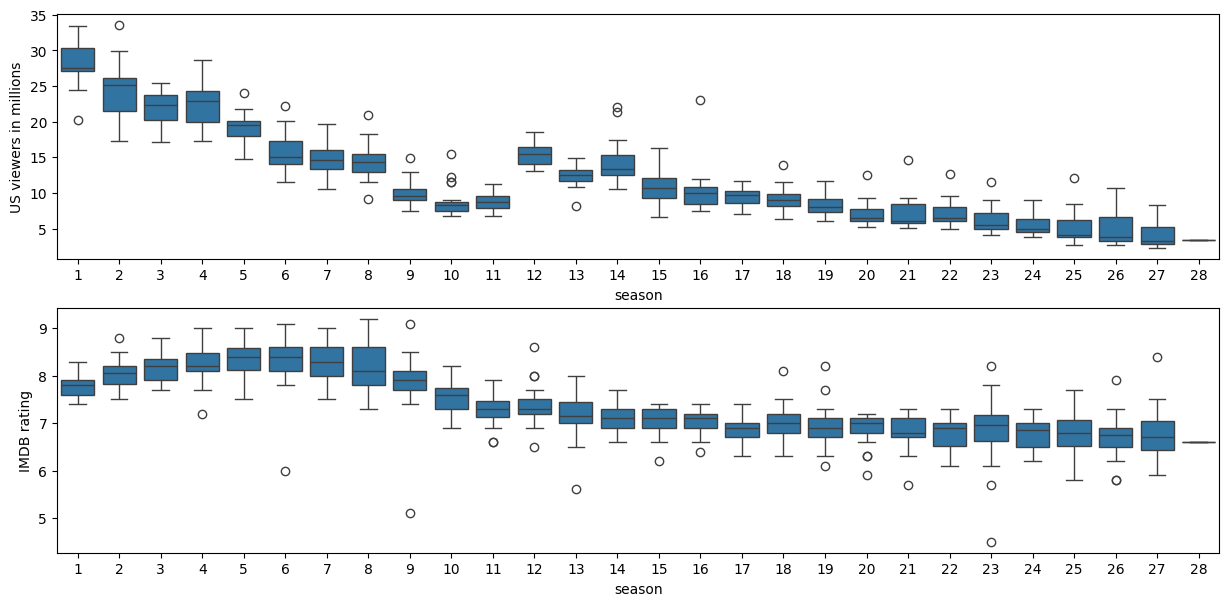

In [8]:
# boxplot

plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
sns.boxplot(data=episodes, x="season", y="us_viewers_in_millions")
plt.xlabel("season")
plt.ylabel("US viewers in millions")

plt.subplot(2,1,2)
sns.boxplot(data=episodes, x="season", y="imdb_rating")
plt.xlabel("season")
plt.ylabel("IMDB rating")

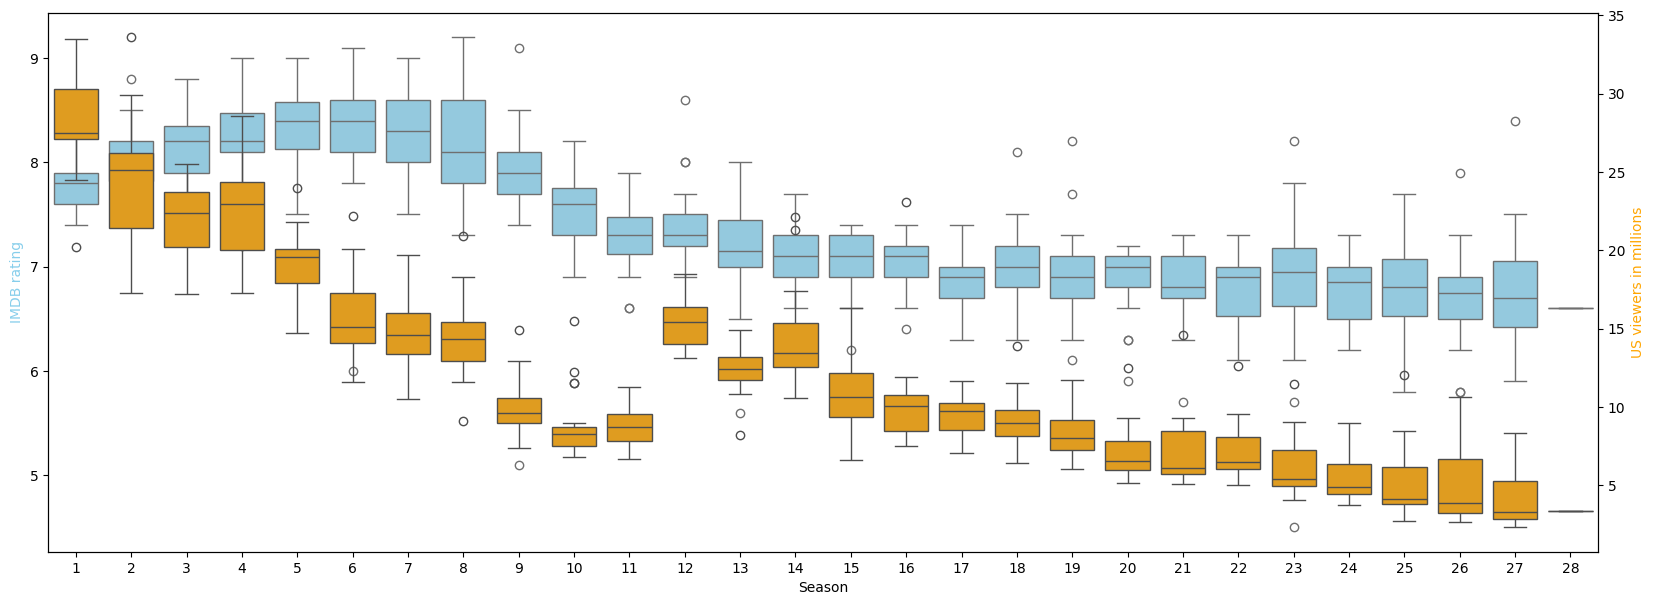

In [9]:
fig, ax1 = plt.subplots(figsize=(20,7))
sns.boxplot(data=episodes, x="season", y="imdb_rating", ax=ax1, color='skyblue')
ax1.set_xlabel("Season")
ax1.set_ylabel("IMDB rating", color='skyblue')
#ax1.tick_params(axis='y', labelcolor='skyblue') vec obojano?
#Create a second y-axis
ax2 = ax1.twinx()
sns.boxplot(data=episodes, x="season", y="us_viewers_in_millions", ax=ax2, color='orange')
ax2.set_ylabel("US viewers in millions", color='orange')
#ax1.tick_params(axis='y', labelcolor='orange')

plt.show()

Text(0, 0.5, 'IMDB rating')

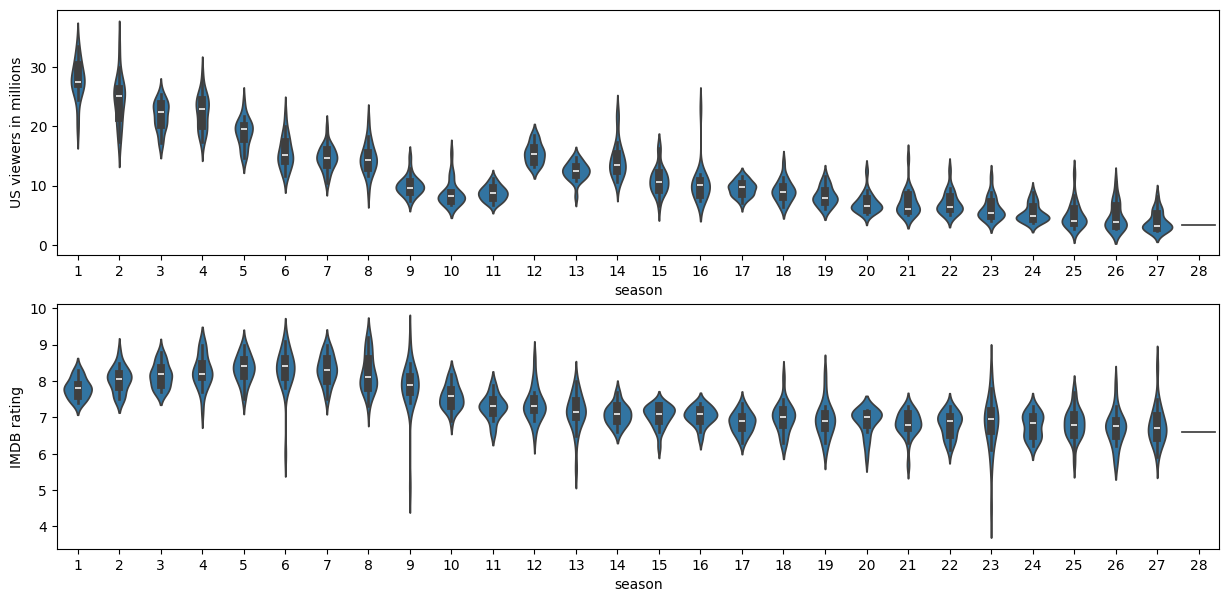

In [10]:
# violinplot

plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
sns.violinplot(data=episodes, x="season", y="us_viewers_in_millions")
plt.xlabel("season")
plt.ylabel("US viewers in millions")

plt.subplot(2,1,2)
sns.violinplot(data=episodes, x="season", y="imdb_rating")
plt.xlabel("season")
plt.ylabel("IMDB rating")

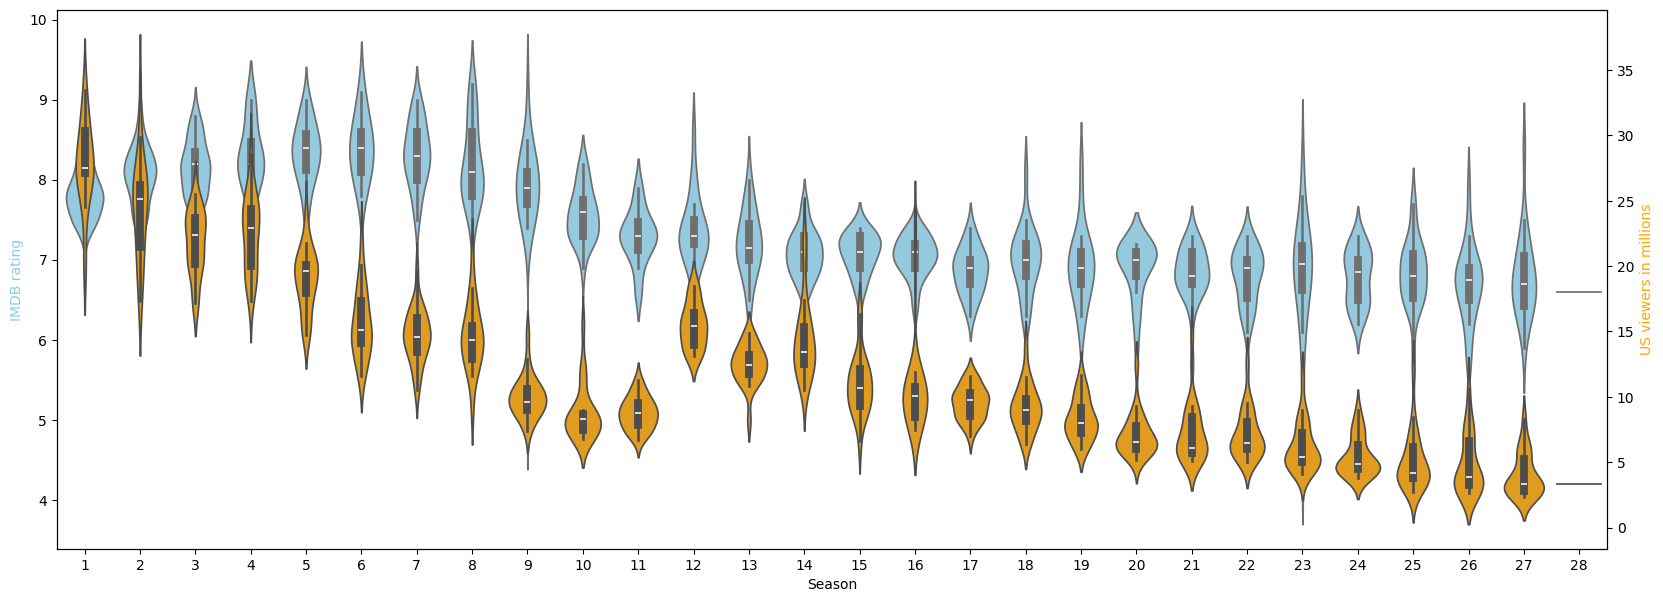

In [11]:
fig, ax1 = plt.subplots(figsize=(20,7))
sns.violinplot(data=episodes, x="season", y="imdb_rating", ax=ax1, color='skyblue')
ax1.set_xlabel("Season")
ax1.set_ylabel("IMDB rating", color='skyblue')
#ax1.tick_params(axis='y', labelcolor='skyblue') vec obojano?
#Create a second y-axis
ax2 = ax1.twinx()
sns.violinplot(data=episodes, x="season", y="us_viewers_in_millions", ax=ax2, color='orange')
ax2.set_ylabel("US viewers in millions", color='orange')
#ax1.tick_params(axis='y', labelcolor='orange')

plt.show()

# 2. Vježbe: Izrada naprednijih vizualizacija

Da bismo napravili dobru vizualizaciju podataka, prvo trebamo imati jasnu ideju o tome što želimo vizualizirati! Objedinjujemo li podatke i kako? Koja bi količina trebala biti na različitim osima? Kako koristiti boje i veličine predmeta? Često pomaže ručno skicirati vizualizaciju prije nego što je kodirate.

U sljedećoj vježbi dobit ćete opise vizualizacija koje bi mogle biti korisne za razumijevanje skupa podataka o filmovima.

## 2.1 Heatmape

- Vizualizirajte IMDB i US views kroz sezone te koristite funkciju Seaborn heatmap te funkciju *pivot* of pandasa

- Konačno, heatmapom možemo predstaviti tri varijable, kodiranjem treće varijable bojom. Pokažite kako sa sezonom opada IMDB ocjena i US views korištenjem heatmape


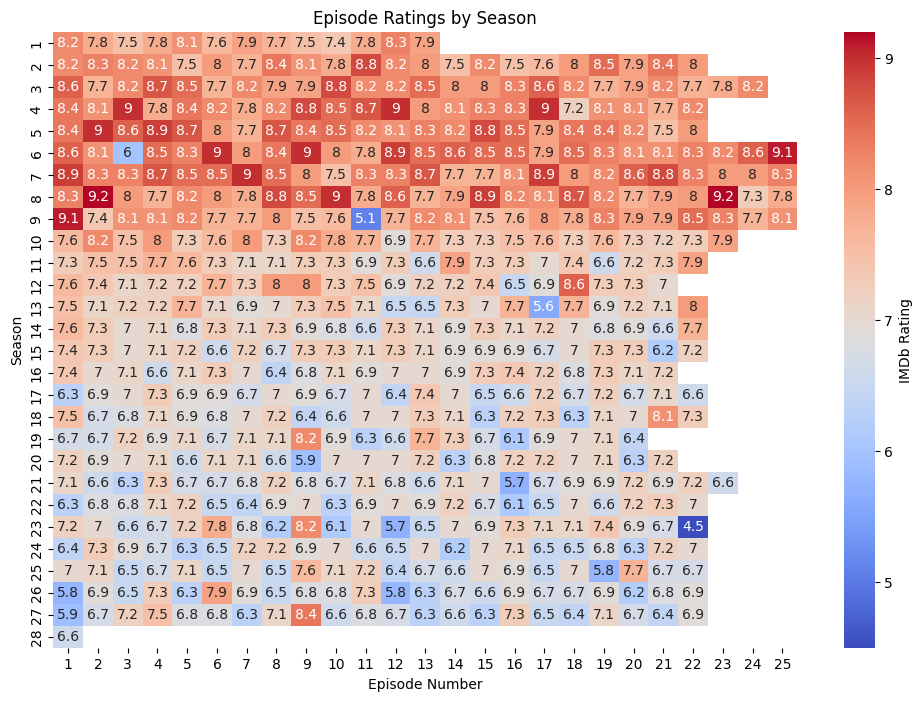

In [12]:
# Napišite svoj kod ovdje da biste kreirali prvu heatmapu

# pivot_table = episodes.pivot_table(index='season', values=['imdb'])

# fig, ax1 =plt.subplots(figsize(20,7))
# sns.heatmap(episodes.corr(), annot=True, camp='columns')

# Pivot the DataFrame to get seasons as rows, episodes as columns
#data = episodes[['season', 'number_in_season', 'imdb_rating']]
heatmap_data = episodes.pivot(index='season', columns='number_in_season',values='imdb_rating')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'IMDb Rating'})
plt.title('Episode Ratings by Season')
plt.xlabel('Episode Number')
plt.ylabel('Season')
plt.show()

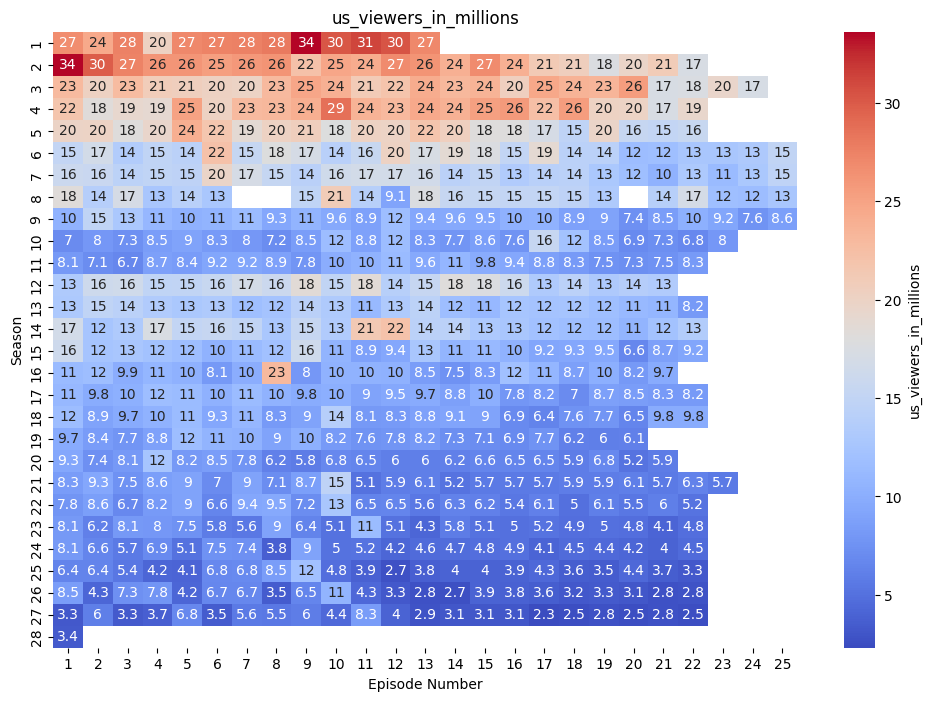

In [13]:
heatmap_data = episodes.pivot(index='season', columns='number_in_season',values='us_viewers_in_millions')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'us_viewers_in_millions'})
plt.title('us_viewers_in_millions')
plt.xlabel('Episode Number')
plt.ylabel('Season')
plt.show()

In [14]:
# Napišite svoj kod ovdje da biste kreirali drugu heatmapu


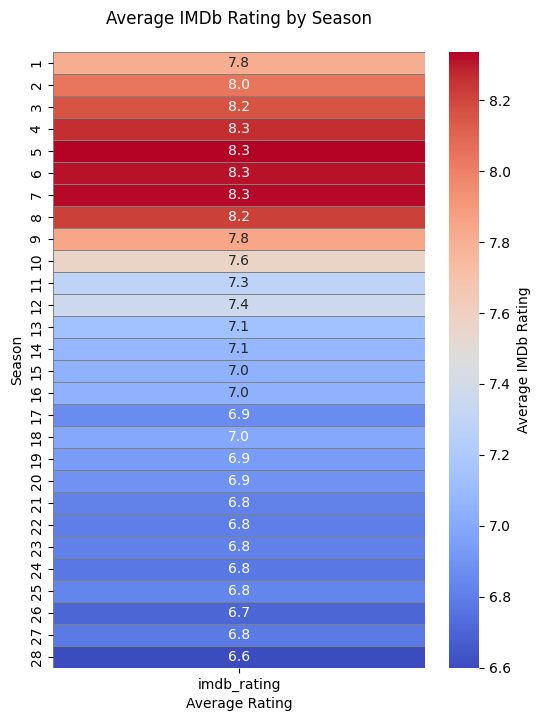

In [15]:
season_ratings = episodes.groupby('season')['imdb_rating'].mean()

# Convert to DataFrame and transpose it for a vertical layout
season_ratings = season_ratings.to_frame()

# Plot the heatmap with added spacing and a vertical orientation
plt.figure(figsize=(6, 8))
sns.heatmap(season_ratings, annot=True, cmap='coolwarm', cbar_kws={'label': 'Average IMDb Rating'}, 
            linewidths=0.5, linecolor='gray', fmt=".1f")
plt.title('Average IMDb Rating by Season', pad=20)
plt.xlabel('Average Rating')
plt.ylabel('Season')

# Show the plot
plt.show()